# Stochastic integral with python #

### Importation of libraries ###

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

### Parameters of simulation ###

In [8]:
M = 1 # number of simulations
t = 10 # Time
n = 1000 # steps we want to see
dt = t/n # time step

### Browian motion ###

In [ ]:
steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

ttime = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=ttime)
tt = tt.T

In [ ]:
plt.plot(tt,bm_paths)

### Stochastic integral ###

$B_{\Delta}.B^{T}_{t} = \sum_{k=0}^{n-1} B_{k}(B_{k+1} - B_{k}) \to \int_{0}^{t} BdB = \frac{1}{2}B_{t}^{2} - \frac{1}{2}t$

In [6]:
def approximation():
    steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
    origin = np.zeros((1,M))
    bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

    ttime = np.linspace(0,t,n+1)
    tt = np.full(shape=(M, n+1), fill_value=ttime)
    tt = tt.T

    a_I = (bm_paths[0:n-1]*(bm_paths[1:n] - bm_paths[0:n-1])).cumsum()
    I = 0.5 * bm_paths**2 - 0.5 * tt
    erreur = abs(a_I[0:n-1] - I[0:n-1])[0].sum()
    return erreur/n
nb=100
erreurs=0
for i in range(nb):
    erreurs += approximation()
print(erreurs/nb)

2.3654471204888177


In [9]:
def affichage():
    steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
    origin = np.zeros((1,M))
    bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

    ttime = np.linspace(0,t,n+1)
    tt = np.full(shape=(M, n+1), fill_value=ttime)
    tt = tt.T

    a_I = (bm_paths[0:n-1]*(bm_paths[1:n] - bm_paths[0:n-1])).cumsum()
    I = 0.5 * bm_paths**2 - 0.5 * tt
    fig, ax = plt.subplots()
    ax.plot(ttime[0:n-1],a_I[0:n-1],ttime[0:n-1],I[0:n-1])
    ax.legend(["approximation","theoretical"])
    
    display(fig)  # Afficher la figure courante
    plt.pause(0.5)  # Pause de 2 secondes pour voir le plot
    plt.close(fig)
    clear_output(wait=True)
    time.sleep(0.5)# Effacer la sortie avant d'afficher le nouveau plot

### Display various examples of approximation of the stochastic integral ###

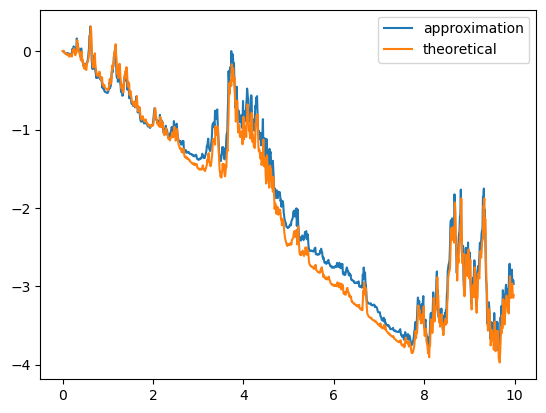

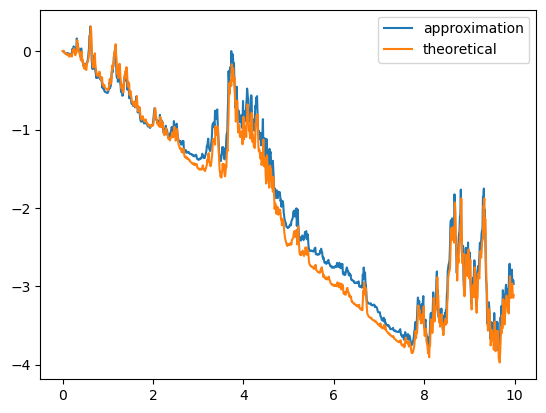

KeyboardInterrupt: 

In [10]:
for _ in range(20):
    affichage()
    time.sleep(1)